Connected to Python 3.11.3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

seed = 0
rnd = np.random.Generator(np.random.PCG64(seed))

In [2]:
# variance = average of squared differences from the mean.
# standard deviation = measure of how spread out values are.
# variance = standard_deviation^2

#  A: Gaussian column vector
length = 1000
std_dev = np.sqrt(1)
mean = 0

x = rnd.normal(mean, std_dev, (length, 1))

#  B: Average power calculation
#    1 : Only additions and multiplications
P1 = np.sum(x**2) / length
#    2 : By computing the vector inner product
P2 = np.dot(x.T, x) / length
#    3 : By computing the vector norm
P3 = np.linalg.norm(x, 2)**2 / length

assert np.allclose(P1, P2) and np.allclose(P2, P3)

In [3]:
#     function of the frequency index
Y1 = np.fft.fft(y1, axis=0)

w = np.arange(0, len(Y1)) / len(Y1)

fig, ax = plt.subplots()
ax.plot(w, 20 * np.log10(np.abs(Y1)))
ax.grid(True)
ax.set_xlim([0, 0.5])  # Only plot single-sided spectrum
ax.legend(['Filter magnitude response'])
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Magnitude')

#  D: We can observe that the filter behaves like a bandstop filter

NameError: name 'y1' is not defined

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

seed = 0
rnd = np.random.Generator(np.random.PCG64(seed))

In [7]:
# variance = average of squared differences from the mean.
# standard deviation = measure of how spread out values are.
# variance = standard_deviation^2

#  A: Gaussian column vector
length = 1000
std_dev = np.sqrt(1)
mean = 0

x = rnd.normal(mean, std_dev, (length, 1))

#  B: Average power calculation
#    1 : Only additions and multiplications
P1 = np.sum(x**2) / length
#    2 : By computing the vector inner product
P2 = np.dot(x.T, x) / length
#    3 : By computing the vector norm
P3 = np.linalg.norm(x, 2)**2 / length

assert np.allclose(P1, P2) and np.allclose(P2, P3)

In [6]:
# variance = average of squared differences from the mean.
# standard deviation = measure of how spread out values are.
# variance = standard_deviation^2

#  A: Gaussian column vector
length = 1000
std_dev = np.sqrt(1)
mean = 0

x = rnd.normal(mean, std_dev, (length, 1))

#  B: Average power calculation
#    1 : Only additions and multiplications
P1 = np.sum(x**2) / length
#    2 : By computing the vector inner product
P2 = np.dot(x.T, x) / length
#    3 : By computing the vector norm
P3 = np.linalg.norm(x, 2)**2 / length

assert np.allclose(P1, P2) and np.allclose(P2, P3)

In [8]:
#  A: Impulse Response Coefficients
h = np.array([[1, 0.18, 0.81]]).T

#  B: Compute the output signal y
#    1: by applying the numpy command: 'np.convolve'
y1 = np.convolve(h[:, 0], x[:, 0], 'full')

#    2: by computing the matrix-vector product (lecture 4, slide 29)
#       - using the matrix definition of the convolution,
c = np.vstack((h, np.zeros((len(x) - 1, 1))))
r = np.vstack((h[0], np.zeros((len(x) - 1, 1))))
H = sp.linalg.toeplitz(c, r)
y2 = np.dot(H, x)

assert np.allclose(y1, y2[:, 0])

Text(0, 0.5, 'Magnitude')

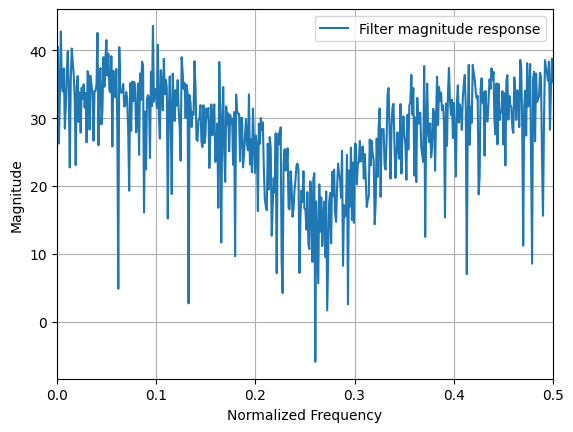

In [8]:
#     function of the frequency index
Y1 = np.fft.fft(y1, axis=0)

w = np.arange(0, len(Y1)) / len(Y1)

fig, ax = plt.subplots()
ax.plot(w, 20 * np.log10(np.abs(Y1)))
ax.grid(True)
ax.set_xlim([0, 0.5])  # Only plot single-sided spectrum
ax.legend(['Filter magnitude response'])
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Magnitude')

#  D: We can observe that the filter behaves like a bandstop filter

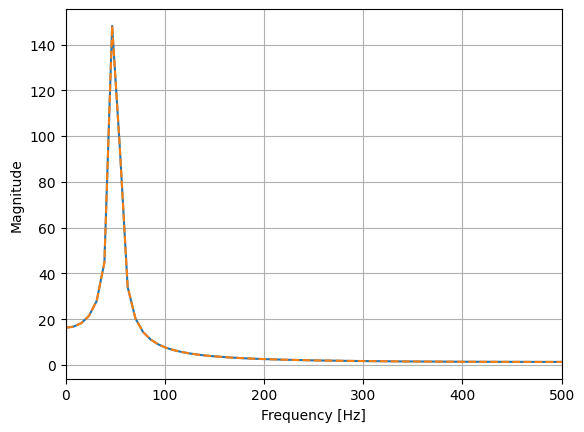

In [9]:
#  A: Compute the DFT of a 128 sample sinusoid signal in 2 different ways.
n = 128    # number of samples in the signal

a = 3      # amplitude of the sine wave.
f = 50     # frequency in Hz.
phase = 0  # phase of the sine wave.

fs = 1000  # sampling frequency = 1 kHz
t = np.arange(0, n/fs, 1/fs)
signal = a * np.sin(2 * np.pi * f * t + phase)

#    1: By applying the fft function
S1 = np.fft.fft(signal)

#    2: By computing the matrix-vector product, making use of the matrix
#    definition of the DFT

# EASY METHOD
dft_matrix_1 = sp.linalg.dft(n)

# MANUAL METHOD
dft_matrix_2 = np.zeros((n, n), dtype=complex)
for i in range(n):
    for j in range(n):
        dft_matrix_2[i, j] = np.exp(-1j * 2*np.pi * (i * j) / n)

assert np.allclose(dft_matrix_1, dft_matrix_2)

S2 = np.dot(dft_matrix_1, signal)

#  B: Plot the DFT magnitude spectrum of both calculation methods
frange = np.arange(0, n) * (fs/n)  # frequency range
fig, ax = plt.subplots()
ax.plot(frange, np.abs(S1))
ax.plot(frange, np.abs(S2), '--')
ax.set_xlim([0, fs // 2])  # Only plot single-sided spectrum
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.grid(True)

In [10]:
#  A: Create 3 vectors of length 8 with Gaussian probability with mean 0,
#  variance 0.1, 0.5 and 1

v1 = rnd.normal(0, np.sqrt(0.1), (8, 1))  # (8x1)
v2 = rnd.normal(0, np.sqrt(0.5), (8, 1))  # (8x1)
v3 = rnd.normal(0, np.sqrt(1), (8, 1))    # (8x1)

#  B: Compute the outer product of each of the 3 vectors with itself
outer1 = np.dot(v1, v1.T)  # (8x1) * (1x8) = (8x8)
outer2 = np.dot(v2, v2.T)  # (8x1) * (1x8) = (8x8)
outer3 = np.dot(v3, v3.T)  # (8x1) * (1x8) = (8x8)

#  C: Create a matrix containing the sum of these three outer products
y = outer1 + outer2 + outer3  # (8x8)

#  D: Compute the rank of this matrix in 2 different ways.
#    1. By computing the eigenvalue decomposition (eig function) and
#    counting the number of non-zero eigenvalues.
eig_vals = np.linalg.eigvals(y)
eig_vals[np.abs(eig_vals) < 1.e-9] = 0
r1 = np.count_nonzero(eig_vals)

#    2. by applying the Scipy function rank.
r2 = np.linalg.matrix_rank(y)

print("Rank of matrix y: " +
      "\n\t Counting nonzero eigenvalues: {}".format(r1) +
      "\n\t Using np.linalg.matrix_rank: {}".format(r2))

Rank of matrix y: 
	 Counting nonzero eigenvalues: 3
	 Using np.linalg.matrix_rank: 3


No kernel connected